In [1]:
import pandas as pd                                             
import numpy as np         
from sklearn.preprocessing import OneHotEncoder

数据读取和预处理

In [2]:
#读取泰坦尼克号的数据(titanic-data.csv)，存储到DataFrame对象
df= pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#方法一：哑变量处理
pd.get_dummies(df['Sex'])   #用One-Hot编码对性别进行数值型转换
df['Sex'].head()            #显示Sex的前5行数据

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [4]:
#方法二map()函数
size_mapping = {'male':1,'female':0}   #将性别值映射为数值
df['Sex'] = df['Sex'].map(size_mapping)          #只显示Sex的前5行数据
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [5]:
#将性别进行编码转换,男性male用1编码，女性female用0编码

#方法三
df.loc[df['Sex'] == 'female','Sex']=0  #直接进行替换
df.loc[df['Sex'] == 'male','Sex']=1
df.head()                         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#方法四
df.replace('male',1,inplace=True)    #用pandas包下data frame的replace替换
df.replace('female',0,inplace=True)
df.head()                           

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.duplicated()   #查找重复数据

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [8]:
df.duplicated(subset=['Survived','Pclass'])  #按照是否生还（Survived）、乘客等级（Pclass）这两项来查看是否有重复值

0      False
1      False
2      False
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 891, dtype: bool

In [9]:
np.sum(df.duplicated())   #完全重复的值的数量

0

In [10]:
df.info()   #数据处理前，观察到Age、Cabin、Embarked有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [16]:
import missingno as msno
msno.matrix(df,figsize=(12,5))    #还可以直接可视化缺失值，更加直观

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

In [17]:
df.isnull().sum()   #统计缺失值数量

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#对于缺失值是数值型数据

#方法一
df['Age'] = df['Age'].fillna(df['Age'].mean())  #缺失值用数据整体均值取代

In [19]:
#方法二
df['Age'] = df['Age'].fillna(df['Age'].interpolate())    #也可用缺失值前后的数据均值填补

In [20]:
#对于缺失值是分类型数据

#针对登船港口（Embarked）
df['Embarked'].value_counts()    #从统计结果来看，S类别最常见

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df['Embarked'] = df['Embarked'].fillna('S')      #将缺失值填充为S

In [22]:
df.dropna(subset=['Embarked'])     #根据前面统计结果显示，Embarked只有2个缺失值，故也可以直接删除缺失值
df['Embarked'].isnull().sum()      #删除后无缺失值，结果显示为0

0

In [23]:
#针对船舱号（Cabin）
df['Cabin'].head()  #查看数据发现船舱号类别多样化，且它的缺失值较多

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [24]:
df['Cabin'] =df['Cabin'].fillna('Un')   #故将船舱号（Cabin）的缺失值用Un填充，表示未知的的船舱号

In [25]:
df.info()  #处理完缺失值再次查看结果

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [26]:
df.describe()  #对数字型数据进行描述性统计

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.describe(include=['object'])   #对字符型数据进行描述性统计

,Name,Ticket,Cabin,Embarked
count,891,891,891,891
unique,891,681,148,3
top,"Reynaldo, Ms. Encarnacion",CA. 2343,Un,S
freq,1,7,687,646


# 数据可视化

In [28]:
#导入可视化相应包
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']   #指定显示字体：宋体
plt.rcParams['axes.unicode_minus'] = False     #轴上的负号设置

探究船舱等级与幸存率的关系

In [29]:
PclassDf = pd.pivot_table(df,
                          index='Pclass',
                          columns='Survived',
                          values='PassengerId',
                          aggfunc='count')

PclassDf

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [30]:
# 汇总统计不同客船等级与是否幸存的比例
PclassDf2 = PclassDf.div(PclassDf.sum(axis=1),axis=0)
PclassDf2

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [31]:
# 获取不同船舱等级的幸存率
PclassDf_rate = PclassDf2.iloc[:,1]
PclassDf_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: 1, dtype: float64

<Figure size 432x288 with 0 Axes>

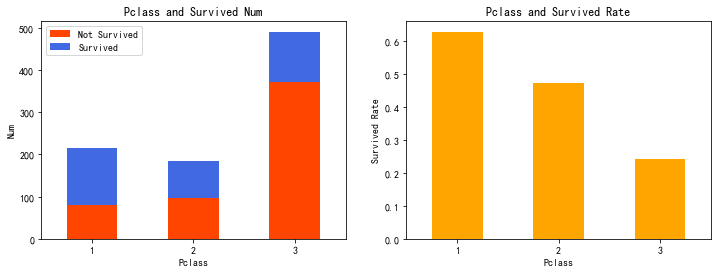

In [32]:
#可视化分析
# 创建画板并设置大小
fig = plt.figure(1)
plt.figure(figsize=(12,4))

# 创建画纸（子图）

#创建画纸，并选择画纸1
ax1 = plt.subplot(1,2,1)
# 在画纸1绘制堆积柱状图
PclassDf.plot(ax=ax1,#选择画纸1
                kind='bar',#选择图表类型
                stacked=True,#是否堆积
                color=['orangered','royalblue'] #设置图表颜色
               )
# x坐标轴横向
plt.xticks(rotation=360)
# x坐标轴文本
plt.xlabel('Pclass')
# y坐标轴文本
plt.ylabel('Num')
# 图表标题
plt.title('Pclass and Survived Num')
# 设置图例
plt.legend(labels=['Not Survived','Survived'],loc='upper left')

# 选择画纸2
ax2 = plt.subplot(1,2,2)
# 在画纸2绘制柱状图
PclassDf_rate.plot(ax=ax2,kind='bar',color='orange')
# x坐标轴横向
plt.xticks(rotation=360)
# x坐标轴文本
plt.xlabel('Pclass')
# y坐标轴文本
plt.ylabel('Survived Rate')
# 图表标题
plt.title('Pclass and Survived Rate')

# 显示图表
plt.show()

In [33]:
#由上面的柱状图可以看出，三等仓位的死亡人数最多，一等舱和二等舱人数相差不多；
#而一等舱幸存率最高，二等舱次之，三等舱最低。

探究性别与幸存率的关系

In [34]:
SexDf = pd.pivot_table(df,index='Sex', columns='Survived', values='PassengerId',aggfunc='count')
SexDf

Survived,0,1
Sex,,
0,81,233
1,468,109


In [35]:
# 汇总统计不同性别与是否幸存的比例
SexDf2 = SexDf.div(SexDf.sum(axis=1),axis=0)
SexDf2

Survived,0,1
Sex,,
0,0.257962,0.742038
1,0.811092,0.188908


In [36]:
# 获取不同性别的幸存率
SexDf_rate = SexDf2.iloc[:,1]
SexDf_rate

Sex
0    0.742038
1    0.188908
Name: 1, dtype: float64

<Figure size 432x288 with 0 Axes>

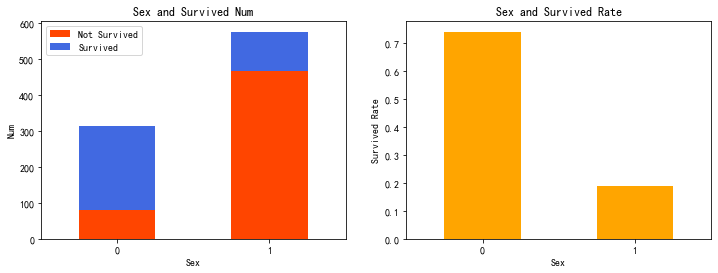

In [37]:
#幸存率与性别的可视化分析
# 创建画板并设置大小
fig = plt.figure(1)
plt.figure(figsize=(12,4))

# 创建画纸（子图）

#创建画纸，并选择画纸1
ax1 = plt.subplot(1,2,1)
# 在画纸1绘制堆积柱状图
SexDf.plot(ax=ax1,kind='bar',stacked=True,color=['orangered','royalblue'])

plt.xticks(rotation=360)
plt.xlabel('Sex')

plt.ylabel('Num')
plt.title('Sex and Survived Num')
# 设置图例
plt.legend(labels=['Not Survived','Survived'],loc='upper left')

# 选择画纸2
ax2 = plt.subplot(1,2,2)

SexDf_rate.plot(ax=ax2,kind='bar',color='orange')

plt.xticks(rotation=360)
plt.xlabel('Sex')

plt.ylabel('Survived Rate')
plt.title('Sex and Survived Rate')

# 显示图表
plt.show()

In [38]:
#从上面的柱状图可以看出，乘客性别以男性为主，大约是女性的两倍；
#男性的幸存率比女性低很多，不及女性的三分之一

探究年龄与幸存率的关系

In [39]:
'''
年龄分组：
儿童（Children）：0-13
青年（Youth）：14-30
中年（Middle-aged）：30-60
老年（The old）：60以上
'''
# 定义年龄分组函数
def ageCut(a):
    if a<=13:
        return '儿童'
    elif 13<a<=30:
        return '青年'
    elif 30<a<=60:
        return '中年'
    else:
        return '老年'
#if 条件为真的时候返回if前面内容，否则返回后面的内容
df['AgeCategory'] =df['Age'].map(ageCut)
df[['AgeCategory','Age' ]].head()

,AgeCategory,Age
0,青年,22.0
1,中年,38.0
2,青年,26.0
3,中年,35.0
4,中年,35.0


In [40]:
AgeDf = pd.pivot_table(df,
                       index='AgeCategory',
                       columns='Survived',
                       values='PassengerId',
                       aggfunc='count',
                       fill_value=0)
AgeDf

Survived,0,1
AgeCategory,,
中年,164,119
儿童,29,42
老年,17,5
青年,339,176


In [41]:
# 汇总统计不同年龄与是否幸存的比例
AgeDf2 = AgeDf.div(AgeDf.sum(axis=1),axis=0)
AgeDf2

Survived,0,1
AgeCategory,,
中年,0.579505,0.420495
儿童,0.408451,0.591549
老年,0.772727,0.227273
青年,0.658252,0.341748


In [42]:
# 获取不同年龄段的幸存率
AgeDf_rate = AgeDf2.iloc[:,1]
AgeDf_rate

AgeCategory
中年    0.420495
儿童    0.591549
老年    0.227273
青年    0.341748
Name: 1, dtype: float64

<Figure size 432x288 with 0 Axes>

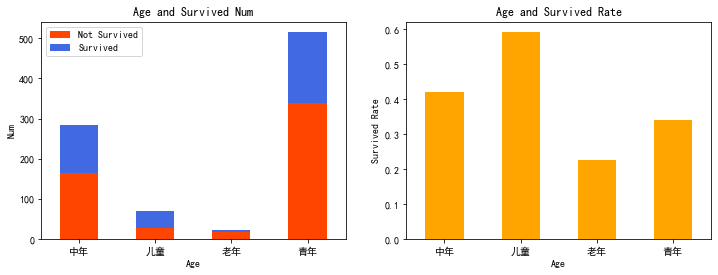

In [43]:
# 创建画板并设置大小
fig = plt.figure(1)
plt.figure(figsize=(12,4))

# 创建画纸（子图）

#创建画纸，并选择画纸1
ax1 = plt.subplot(1,2,1)
# 在画纸1绘制堆积柱状图
AgeDf.plot(ax=ax1,kind='bar',stacked=True,color=['orangered','royalblue'])

plt.xticks(rotation=360)
plt.xlabel('Age')

plt.ylabel('Num')
plt.title('Age and Survived Num')
# 设置图例
plt.legend(labels=['Not Survived','Survived'],loc='upper left')

# 选择画纸2
ax2 = plt.subplot(1,2,2)

AgeDf_rate.plot(ax=ax2,kind='bar',color='orange')

plt.xticks(rotation=360)
plt.xlabel('Age')

plt.ylabel('Survived Rate')

plt.title('Age and Survived Rate')

# 显示图表
plt.show()

In [44]:
#由上述的分析可知，青年的存活人数最多，中年人次之。
#而儿童的存活比例最大，中年人次之。

In [45]:
#方法二：使用pivot_table函数，直接综合考虑性别（Sex），船舱号（Pclass）与生还率关系
df.pivot_table(values="Survived",index=["Pclass","Sex"],aggfunc=np.mean)

Survived
Pclass Sex          
1      0    0.968085
       1    0.368852
2      0    0.921053
       1    0.157407
3      0    0.500000
       1    0.135447

In [46]:
#根据该方法对性别和仓位等级进行综合分析可以看出，存活率最高的是一等仓位的女性乘客，而存活率最低的为三等舱的男性。

In [47]:
target=df['Survived']
features=df[1:]

In [48]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,中年
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,Un,S,青年
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,中年
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,Un,S,中年
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Un,Q,青年
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,Un,S,青年
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,青年
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,Un,S,青年
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,青年


In [50]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [51]:
#使用Keras实现神经网络进行分类预测。

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [53]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [54]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
#该模型有两个隐藏层，每个隐藏层有64个神经元，使用ReLU激活函数。输出层只有一个神经元，并使用sigmoid激活函数。

In [58]:
#训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 1ms/step - loss: 0.9508 - accuracy: 0.6517
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6882
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.6910
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.6966
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.6980
Epoch 6/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7079
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7037
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.6910
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7247
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.7149
Epoch 11/50
23/23 [

In [59]:
#通过测试集来评估模型的性能
score = model.evaluate(X_test, y_test, batch_size=128)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7654
Test accuracy: 0.7653631567955017


<AxesSubplot:xlabel='Sex', ylabel='count'>

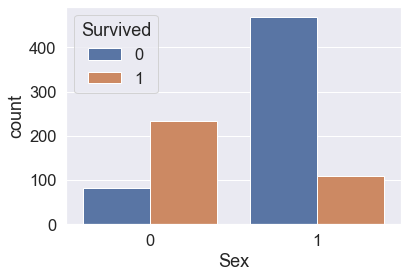

In [60]:
#方法二：使用matplotlib的扩展包seaborn进行绘图
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.5)
sns.countplot(x='Sex',hue='Survived',data=df)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

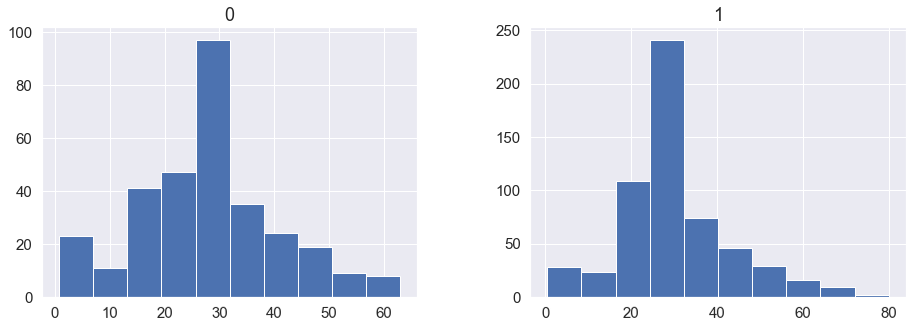

In [61]:
#不同性别Sex、不同年龄Age存活人数统计图绘制
df.hist(by='Sex',column='Age',figsize=(15,5),xlabelsize=15,ylabelsize=15,xrot=True)

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

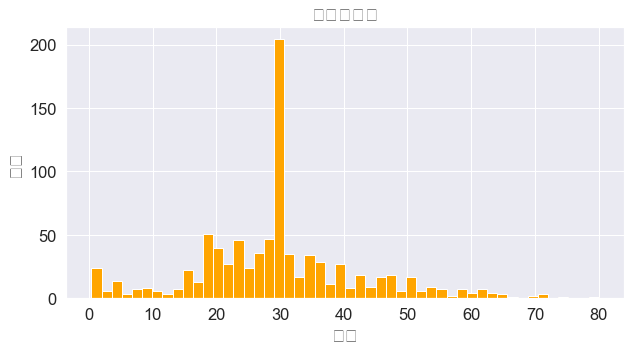

In [62]:
#年龄Age分布直方图（无性别Sex之分）

fig=plt.figure(figsize=(10,5))
plt.hist(df.Age,50,color='orange')
plt.xlabel('年龄')
plt.ylabel('频数')
plt.title('年龄分布图')
plt.show()

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24212 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

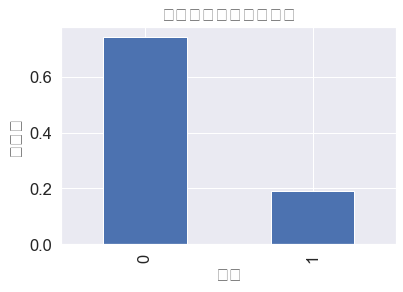

In [63]:
#性别Sex对应存活率柱状图

group1=df['Survived'].groupby(df['Sex'])
group1.count()
group1.mean().plot.bar()
group1.mean().plot(kind='bar')
plt.title('性别对应存活率柱状图')
plt.xlabel('性别')
plt.ylabel('存活率')
plt.show()

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

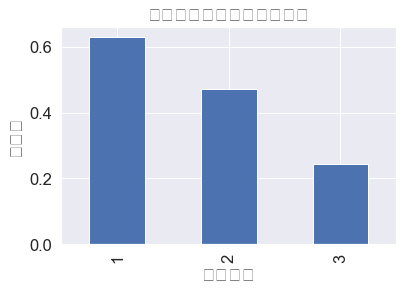

In [64]:
#舱位等级Pclass对应存活率柱状图
#方法一
group2=df['Survived'].groupby(df['Pclass'])
group2.count()
group2.mean()
group2.mean().plot(kind='bar')
plt.title('乘客等级对应存活率柱状图')
plt.xlabel('舱位等级')
plt.ylabel('存活率')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

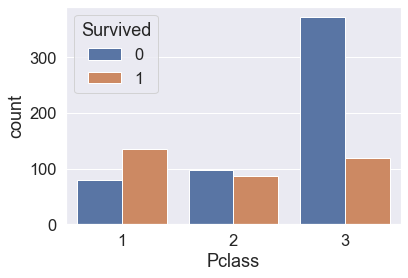

In [65]:
#方法二
sns.countplot(x='Pclass',hue='Survived',data=df)

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

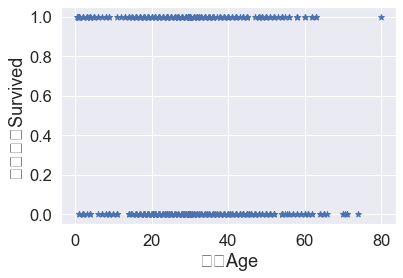

In [66]:
#年龄Age对应的是否存活Survived的散点图

plt.scatter(x=df['Age'],y=df['Survived'],c='b',marker='*',label='arrow')
plt.xlabel('年龄Age')
plt.ylabel('是否存活Survived')
plt.show()

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

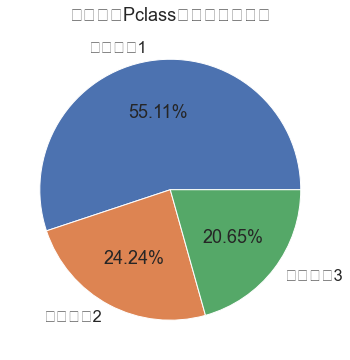

In [67]:
#绘制分组统计后的舱位等级Pclass对应的人数结果饼状图

plt.figure(figsize=(6,6))
label=['舱位等级1','舱位等级2','舱位等级3']
plt.pie(df['Pclass'].value_counts(),labels=label,autopct='%1.2f%%')
plt.title('舱位等级Pclass对应的人数结果')
plt.show()

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

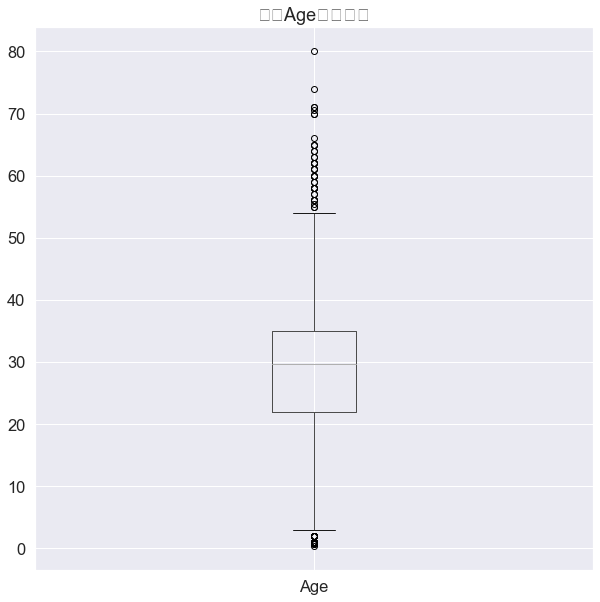

In [68]:
#绘制年龄Age的箱型图

#方法一：用df.boxplot
plt.figure(figsize=(10,10))
plt.title('年龄Age的箱型图')
df.boxplot(column='Age')
plt.show()

<AxesSubplot:ylabel='Age'>

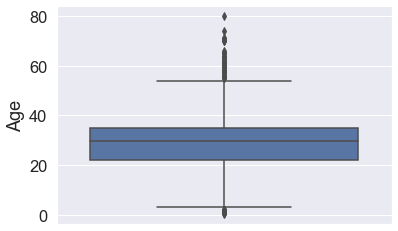

In [69]:
#方法二：用sns.boxplot
sns.boxplot(y='Age',data=df,showfliers=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc86f6ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc86f7a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc86f6caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc86f7ac40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc86f7afa0>],
 'means': []}

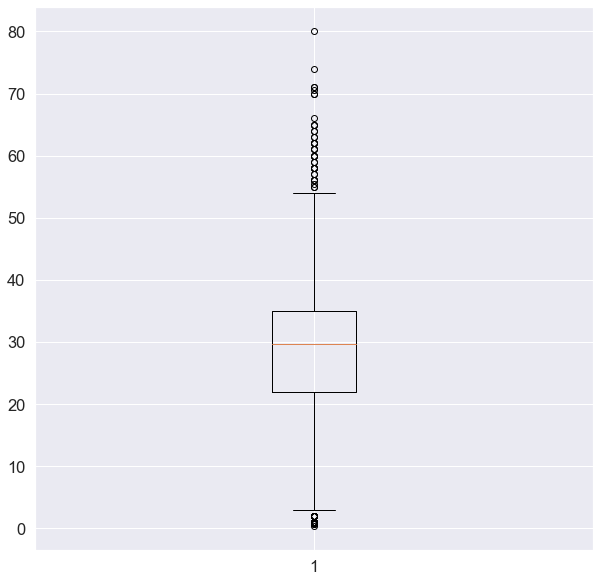

In [70]:
#方法三：用plt.boxplot
plt.figure(figsize=(10,10))
plt.boxplot(df.Age)

In [71]:
df["Age"].describe()  #单独对Age进行描述

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [72]:
#由上述箱型图可以看出：
#上四分位数Q3是35(岁)，下四分位数Q1是22(岁)，上限是80（岁），下限是0.42（说明有怀孕的妇女或婴儿）；有异常值
#整体来看，Age箱型间距较小，表明数据较集中；箱型高度较低，表明整体数值较小，年龄较青年化

逻辑回归分析

In [73]:
#使用statsmodels中的逻辑回归方法分析一切与存活率相关的因素
import statsmodels.formula.api as smf

Sex_ols=smf.ols(formula="Survived ~ Sex", data=df).fit()   #Sex因变量单独对Survived的回归分析
Sex_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.41e-69
Time:                        18:23:05   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7420      0.023     32.171      0.000       0.697       0.787
Sex           -0.5531      0.029    -19.298      0.000      -0.609      -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#解释主要分析指标

#1.判断模型整体
#R^2是0.295，表示该模型只能解释29.5%，拟合优度中等偏下。（调整后的R^2是0.294）
#模型F的F检验统计量=372.4；模型Prob值=1.41e-69<0.05，故整体来看模型显著


#2.看自变量分析模型
#直线的截距是0.7420，这反映了女性的存活率（与前面计算出来的值是一致的）
#直线的斜率是-0.5531，是负数，这说明：男性的存活率低于女性，真实反映遇难时先救助女性的原则，对弱势群体的帮扶
#在t分布下，该因变量的显著性检验P值<0.05，说明该自变量（Sex）对因变量（Survived）影响是很显著的！

In [75]:
Pclass_ols=smf.ols(formula="Survived ~ Pclass", data=df).fit()  #Pclass因变量单独对Survived的回归分析
Pclass_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           2.54e-25
Time:                        18:23:06   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8386      0.045     18.597      0.000       0.750       0.927
Pclass        -0.1970      0.018    -10.725      0.000      -0.233      -0.161
==============================================================================
Omnibus:                     1338.045   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.541
Skew:                           0.428   Prob(JB):                     9.79e-20
Kurtosis:                       1.725   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#解释主要分析指标

#1.判断模型整体
#R^2是0.115，表示该模型只能解释1.5%，拟合优度不是很好。（调整后的R^2是0.114）
#模型F的F检验统计量=115；模型Prob值=2.54e-25<0.05，故整体来看模型显著


#2.看自变量分析模型
#直线的截距是0.8386，斜率是-0.1970，是负数，这说明：舱位等级越高生存率越低
#在t分布下，该因变量的显著性检验P值<0.05，说明该自变量（Pclass）对因变量（Survived）影响是很显著的！

In [77]:
Age_ols=smf.ols(formula="Survived ~ Age", data=df).fit()   #Age因变量单独对Survived的回归分析
Age_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.354
Date:                Tue, 27 Jun 2023   Prob (F-statistic):             0.0372
Time:                        18:23:08   Log-Likelihood:                -619.79
No. Observations:                 891   AIC:                             1244.
Df Residuals:                     889   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4614      0.041     11.368      0.000       0.382       0.541
Age           -0.0026      0.001     -2.087      0.037      -0.005      -0.000
==============================================================================
Omnibus:                     4147.020   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.768
Skew:                           0.476   Prob(JB):                     8.18e-33
Kurtosis:                       1.247   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#解释主要分析指标

#1.判断模型整体
#R^2是0.005，表示该模型只能解释0.5%，拟合优度不好。（调整后的R^2是0.004）
#模型F的F检验统计量=4.354；模型Prob值=0.0372<0.05，故整体来看模型还算显著


#2.看自变量分析模型
#直线的截距是0.4614，斜率是-0.0026，是负数（但几乎趋近于0），这说明：年龄较大的相对来说存活率较低
#在t分布下，该因变量的显著性检验P值<0.05，说明该自变量（Age）对因变量（Survived）影响是显著的。

In [79]:
general_ols=smf.ols(formula="Survived ~ Sex+Pclass+Age", data=df).fit()   #Sex、Pclass、Age三个因素整体对Survived作回归分析
general_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     183.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.11e-92
Time:                        18:23:09   Log-Likelihood:                -406.57
No. Observations:                 891   AIC:                             821.1
Df Residuals:                     887   BIC:                             840.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2835      0.058     22.142      0.000       1.170       1.397
Sex           -0.4989      0.027    -18.253      0.000      -0.553      -0.445
Pclass        -0.1852      0.017    -11.222      0.000      -0.218      -0.153
Age           -0.0050      0.001     -4.750      0.000      -0.007      -0.003
==============================================================================
Omnibus:                       35.683   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.081
Skew:                           0.510   Prob(JB):                     3.26e-09
Kurtosis:                       3.106   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#解释主要分析指标

#1.判断模型整体
#R^2是0.383，表示该模型只能解释38.3%，拟合优度中等偏下。（调整后的R^2是0.381）
#模型F的F检验统计量=183.8；模型Prob值=1.11e-92<0.05，故整体来看模型显著


#2.看自变量分析模型
#直线的截距是1.2835，三个自变量的相应系数分别是-0.4989（Sex）、-0.1852（Pclass）、-0.0050（Age）
#在t分布下，该三个自变量的显著性检验P值<0.05，说明自变量（Sex、Pclass、Age）对因变量（Survived）影响是很显著的！

In [81]:
#使用sklearn中的逻辑回归方法分析一切与存活率相关的因素

#导入算法：逻辑回归算法
from sklearn.linear_model import LogisticRegression
#创建模型：逻辑回归（logisic regression）
model = LogisticRegression()

In [82]:
#逻辑回归分析Sex与Survived间的关系

x_train_Sex=df['Sex'].values.reshape(-1,1)  #取出一部分Sex作为因变量的训练集
y_train_Sex = df['Survived']

model.fit( x_train_Sex ,y_train_Sex )  #训练模型
LogisticRegression()
print("Sex与Survived回归模型截距是{0},系数是{1}，得分是{2}\n".format(model.intercept_,model.coef_,model.score( x_train_Sex ,y_train_Sex )))


Sex与Survived回归模型截距是[1.01628767],系数是[[-2.44597988]]，得分是0.7867564534231201



In [83]:
#逻辑回归分析Age与Survived间的关系

x_train_Age=df['Age'].values.reshape(-1,1)   #取出一部分Age作为因变量的训练集
y_train_Age = df['Survived']

model.fit( x_train_Age, y_train_Age )
LogisticRegression()
print("Age与Survived回归模型截距是{0},系数是{1}，得分是{2}\n".format(model.intercept_,model.coef_,model.score( x_train_Age ,y_train_Age )))


Age与Survived回归模型截距是[-0.14327465],系数是[[-0.01119713]]，得分是0.6161616161616161



In [84]:
#逻辑回归分析Pclass与Survived间的关系

x_train_Pclass=df['Pclass'].values.reshape(-1,1)    #取出一部分Pclass作为因变量的训练集
y_train_Pclass = df['Survived']

model.fit(x_train_Pclass ,y_train_Pclass )
LogisticRegression()
print("Pclass与Survived回归模型截距是{0},系数是{1}，得分是{2}\n".format(model.intercept_,model.coef_,model.score( x_train_Pclass ,y_train_Pclass )))


Pclass与Survived回归模型截距是[1.43255005],系数是[[-0.84371207]]，得分是0.6790123456790124



In [85]:
#从上述单独分析各因素与Survived间的关系的关系来看：
#Sex与Survived的模型得分是:0.7868，回归拟合效果最好，得分是三者中最高的。
#故Sex是显著影响Survived最大的相关因素

In [86]:
#逻辑回归分析Sex、Age、Pclass与Survived间的关系

x_combination=['Pclass', 'Sex', 'Age']   #设置自变量组合
x_train3=df[x_combination]
y_train3 = df['Survived']

model.fit(x_train3 ,y_train3  )
LogisticRegression()
print("Sex、Age、Pclass与Survived回归模型截距是{0},系数是{1}，得分是{2}\n".format(model.intercept_,model.coef_,model.score(x_train3 ,y_train3 )))

Sex、Age、Pclass与Survived回归模型截距是[4.59372315],系数是[[-1.13839277 -2.51947829 -0.03285112]]，得分是0.8002244668911336



In [87]:
#观察发现:Sex、Age、Pclass与Survived的回归模型得分=0.8，表明模型效果很不错，接下来可以用该模型进行预测

In [88]:
x_pred = x_train3.iloc[5:9,:]  #抽取出一部分数据作为预测集
y_pred = model.predict(x_pred) 
y_pred

array([0, 0, 0, 1], dtype=int64)

In [89]:
print(df['Survived'].iloc[5:9])  #显示数据中的真实值

5    0
6    0
7    0
8    1
Name: Survived, dtype: int64


In [90]:
#根据上述结果可以看出模型预测的准确性，再一次证明模型显著，回归成功

决策树分类分析

In [91]:
#由于后面要进行决策树分析，故再对其余将要成为特征变量的指标进行编码（前面只对Sex进行了编码）

In [92]:
#对Embarked分类编码

#存放提取后的特征
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies(df['Embarked'],prefix = 'Embarked')

df = pd.concat([df,embarkedDf],axis = 1)    #合并数据到df
df.drop('Embarked',axis = 1, inplace = True)  #删除df原有Embarked值，用编码后的值取代
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Un,青年,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,中年,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Un,青年,0,0,1


In [93]:
#对Pclass分类编码
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(df['Pclass'],prefix='Pclass')

df = pd.concat([df,pclassDf],axis=1)
df.drop('Pclass',axis=1,inplace=True)  #删除df原有Cabin值，用编码后的值取代
df.head(3)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeCategory,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Un,青年,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,中年,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Un,青年,0,0,1,0,0,1


In [94]:
#接着对字符串数据类型进行分类编码

In [95]:
#对乘客姓名（Name）编码

#注意到在乘客名字（Name）中，有一个显著的特点：
#乘客头衔每个名字当中都包含了具体的称谓或者说是头衔，将这部分信息提取出来后可以作为一个新变量，帮助后面进行预测。

#定义函数，从姓名中获取头衔
def getTitle(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

#存放提取后的特征
titleDf = pd.DataFrame()
titleDf['Title']=df['Name'].map(getTitle)   #map函数，应用自定义函数
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [96]:
titleDf['Title'].value_counts()  #查看原本数据中都有哪几种头衔及数量

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Lady              1
Capt              1
Ms                1
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [97]:
#观察发现头衔数量较多，故定义以下几种头衔类别：
#Officer政府官员
#Royalty王室
#Mr已婚男士
#Mrs已婚妇女
#Miss年轻未婚女子
#Master有技能的人/教师

title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
titleDf = pd.get_dummies(titleDf['Title'])  #对头衔进行编码

df = pd.concat([df,titleDf],axis=1)  #将头衔数据合并到df
df.drop('Name',axis=1,inplace=True)  #删除df原有Name值，用编码后的值取代
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeCategory,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,1,22.0,1,0,A/5 21171,7.2500,Un,青年,...,1,0,0,1,0,0,1,0,0,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,中年,...,0,1,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,Un,青年,...,1,0,0,1,0,1,0,0,0,0
3,4,1,0,35.0,1,0,113803,53.1000,C123,中年,...,1,1,0,0,0,0,0,1,0,0
4,5,0,1,35.0,0,0,373450,8.0500,Un,中年,...,1,0,0,1,0,0,1,0,0,0


In [98]:
#对Cabin进行编码

cabinDf = pd.DataFrame()
df['Cabin'] = df['Cabin'].map(lambda c : c[0]) #使用lambda匿名函数获取客舱号首字母
cabinDf = pd.get_dummies(df['Cabin'],prefix='Cabin')

df = pd.concat([df,cabinDf],axis=1)    #合并客舱类别到df
df.drop('Cabin',axis=1,inplace=True)  #删除df原有Cabin值，用编码后的值取代
df.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,AgeCategory,Embarked_C,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,1,22.0,1,0,A/5 21171,7.2500,青年,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,中年,1,...,0,0,0,1,0,0,0,0,0,0


In [99]:
#针对SibSp（堂兄弟/妹个数）、Parch（父母与小孩个数），将两者合并成家庭类便于后面特征变量的选择，然后编码

familyDf = pd.DataFrame()
familyDf['FamilySize'] = df['Parch'] + df['SibSp'] + 1  #家庭规模计算（要算上自己，所以+1）
familyDf['Family_Single'] = familyDf['FamilySize'].map(lambda s:1 if s==1 else 0)   #定义独生子女家庭
familyDf['Family_Small'] = familyDf['FamilySize'].map(lambda s:1 if 2<=s<=4 else 0)    #定义2-4人小家庭
familyDf['Family_Large'] = familyDf['FamilySize'].map(lambda s:1 if 5<=s else 0)      #定义多余5人大家庭

df = pd.concat([df,familyDf],axis=1)  #将数据并入df
df.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,AgeCategory,Embarked_C,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,1,0,1,22.0,1,0,A/5 21171,7.2500,青年,0,...,0,0,0,0,0,1,2,0,1,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,中年,1,...,0,0,0,0,0,0,2,0,1,0


In [100]:
#将特征变量合并，作为最后划分训练集和测试集的数据
df_X = pd.concat([titleDf,pclassDf,familyDf,df['Fare'],cabinDf,embarkedDf,df['Sex']],axis=1)
df_X.head(3)

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [101]:
#导入机器学习模型中的拆分函数
from sklearn.model_selection import train_test_split

#将数据集拆分为训练集和测试集
train_X,test_X,train_y,test_y = train_test_split(df_X,df['Survived'],train_size=.8)  #训练集与测试集按0.8比例划分
print('训练集数据行数及列数:',train_X.shape)
print('测试集数据行数及列数:',test_X.shape)

训练集数据行数及列数: (712, 27)
测试集数据行数及列数: (179, 27)


In [102]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# 机器学习（决策树）
estimator = DecisionTreeClassifier(max_depth=5)  # 设置最大深度为5
estimator.fit(train_X, train_y)

y_pre = estimator.predict(test_X)
print("预测结果:", y_pre)
print("模型得分",estimator.score(test_X, test_y))

预测结果: [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1]
模型得分 0.8268156424581006


In [103]:
import graphviz
from sklearn import tree

# 决策树可视化
dot_data = tree.export_graphviz(estimator, out_file=None)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

In [104]:
#测试评价决策树

#混淆矩阵
import sklearn.metrics
y_true=df['Survived'].iloc[712:]
r = sklearn.metrics.confusion_matrix(y_true, y_pre)
print(r)

[[78 37]
 [47 17]]


In [105]:
#根据混淆矩阵结果来看:
#预测与真实的Survived=0（死亡）一致的有85个数据，错把Survived=0预测成Survived=1的有30个数据
#预测与真实的Survived=1（存活）一致的有18个数据，错把Survived=1预测成Survived=0的有46个数据

In [106]:
#准确率
print(sklearn.metrics.accuracy_score(y_true, y_pre))

0.5307262569832403


In [107]:
#该模型做出一个正确预测的准确率是57.54%.

In [108]:
#精确率
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pre,average=None))  #另average=None，分别算出死亡(Survived=0)、存活(Survived=1)的精确率

[0.624      0.31481481]


In [109]:
#死亡(Survived=0)的精确率=0.649，存活(Survived=1)的精确率=0.375；相比之下，死亡的精确率较高，更接近1，故该模型检测出死亡的精确度越高

In [110]:
#召回率
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pre, average=None))   #另average=None，分别算出死亡(Survived=0)、存活(Survived=1)的召回率

[0.67826087 0.265625  ]


In [111]:
#死亡(Survived=0)的召回率=0.739，存活(Survived=1)的召回率=0.281；相比之下，死亡的召回率较高，更接近1，故该模型越能检测出死亡的positive样本

In [112]:
#整体评价比较逻辑回归模型和决策树模型

#根据之前对各个结果的一步步分析说明可以看出：

#1.逻辑回归对数据整体结构的分析优于决策树：逻辑回归能够直接得出自变量系数及截距，还有拟合优度等指标
#但决策树对局部结构的分析优于逻辑回归：决策树采用分割的方法，能够深入数据细部（从可视化的决策树就能够看出）

#2.决策树的结果和逻辑回归相比略显粗糙，它只能得到模型的最终得分，无法看到自变量与因变量的关系
#而且逻辑回归原则上可以提供数据中每个观察点的概率，而决策树只能把挖掘对象分为有限的概率组群

#3.逻辑回归对极值比较敏感，模型结果容易受极端值的影响，但决策树在这方面表现较好

#4.逻辑回归擅长分析线性关系，而决策树对线性关系的把握较差。
#虽然对付非线性关系是决策树的强项，但是很多非线性关系完全可以用线性关系作为近似，而且效果很好。
#线性关系在实践中有很多优点：简洁，易理解，可以在一定程度上防止对数据的过度拟合。

#5.逻辑回归的函数表达式较简单，回归系数、截距就能够确定模型。决策树的形式相对就复杂了，叶子节点的范围+取值。

In [113]:
#随机森林

In [118]:
#读取泰坦尼克号的数据(titanic-data.csv)，存储到DataFrame对象
data= pd.read_csv("titanic-data.csv")
# 随机森林（泰坦尼克号游客存活率预估）
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 

# 2、设置特征值和目标值
train = data[['Pclass', 'Age', 'Cabin', 'Sex']]
test = list(data['Survived'])
 
# 3、数据处理
# 3-1、缺失值处理
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Cabin'].fillna(train['Cabin'][1], inplace=True)
 
# 3-2、特征值转换为字典
train = train.to_dict(orient='records')
 
# 3-3、划分数据集
train_data, test_data, train_target, test_target = train_test_split(train, test)
# print(train_data)
 
# 4、特征工程（字典特征值提取）
transfer = DictVectorizer()
train_data = transfer.fit_transform(train_data)
test_data = transfer.transform(test_data)
# print(train_data)
 
# 5、创建决策树预估器，训练
# 5-1、创建随机森林预估器
estimator = RandomForestClassifier()
# 5-2、参数准备（网格搜索）
param_dict = {'n_estimators':[120,200,300,500,800,1200], 'max_depth':[5,8,15,25,30]}
estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)
# 5-3、训练
estimator.fit(train_data, train_target)
 
# 6、模型评估
# 方法一：比对
predict = estimator.predict(test_data)
print(predict == test_target)
 
# 方法二：计算分数（正确率）
score = estimator.score(test_data, test_target)
print('准确率为：', score)
 

C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False False False
 False False  True  True  True  True  True  True  True False  True  True
  True  True  True  True False False False  True  True False  True False
  True False  True  True  True  True  True  True  True False False  True
  True False  True False False  True False  True  True  True  True  True
  True  True  True  True False False  True  True False False  True  True
  True  True False  True  True  True  True  True False  True  True False
  True False False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  T

In [119]:
#SVM(SVC)

In [120]:
import pandas as pd
# 数据读取、查看
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
#根据之前所有的数据预处理选取出最好的方法填充缺失值

# 平均值填充年龄缺失值
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
# 年龄的字符串改int
titanic.loc[titanic['Sex'] == 'male','Sex' ] = 0
titanic.loc[titanic['Sex'] == 'female','Sex' ] = 1
# S填充Embarked缺失值
titanic['Embarked'] = titanic['Embarked'].fillna('S')
# Embarked 字符串改int
titanic.loc[titanic['Embarked'] == 'S','Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C','Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q','Embarked'] = 2
# Cabin字段 用U填充
titanic['Cabin'] = titanic['Cabin'].fillna( 'U' )

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0


In [122]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score
# SVM
from sklearn.svm import SVC

alg = SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr')#定义计算模型（用于分类，故运用SVC）
predictors = ['Pclass','Sex' ,'Age','SibSp', 'Parch' , 'Fare' ,'Embarked']#定义特征字段

kf = KFold(n_splits=3, shuffle=True, random_state=1)
# kf  K折交叉验证方法  这里是3折交叉验证（随机划分训练集为3份，分别取不同的一部分作为训练一部分作为测试，最后加权合并结果。）

test_accurate = []
for train, test in kf.split(titanic[predictors]):  # 表示划分这些个特征做交叉验证

    train_predictors = (titanic[predictors].iloc[train,:]) # 拿出来训练的数据 pandas.iloc方法提供了基于整数的索引方式
    train_target = titanic["Survived"].iloc[train] # 拿出来lable值
    # 模型计算
    alg.fit(train_predictors, train_target)

    test_predictions = (titanic[predictors].iloc[test,:]) # 拿出来测试的数据集
  
    test_target = titanic["Survived"].iloc[test] # 拿出来测试的lable值
    # 这里有个东西需要注意，训练集  测试集 验证集
    pre_train = alg.predict(train_predictors)
    pre_test = alg.predict(test_predictions)

    test_accurate.append(accuracy_score(test_target,pre_test))
test_accurate = sum(test_accurate)/3 # 取平均值
print("预测准确度：",test_accurate)

预测准确度： 0.6397306397306397


In [123]:
#KNN算法

In [124]:
#重新读取泰坦尼克号的数据(titanic-data.csv)，存储到DataFrame对象
df= pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
#将性别进行编码转换,男性male用1编码，女性female用0编码

#方法一
df.loc[df['Sex'] == 'female','Sex']=0  #直接进行替换
df.loc[df['Sex'] == 'male','Sex']=1
df.head()       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: object

In [127]:
df.duplicated()   #查找重复数据

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [128]:
df.duplicated(subset=['Survived','Pclass'])  #按照是否生还（Survived）、乘客等级（Pclass）这两项来查看是否有重复值

0      False
1      False
2      False
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 891, dtype: bool

In [129]:
np.sum(df.duplicated())   #完全重复的值的数量

0

In [130]:
df.info()   #数据处理前，观察到Age、Cabin、Embarked有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df.isnull().sum()   #统计缺失值数量

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
#对于缺失值是分类型数据

#针对登船港口（Embarked）
df['Embarked'].value_counts()    #从统计结果来看，S类别最常见

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
df['Embarked'] = df['Embarked'].fillna('S')      #将缺失值填充为S

In [134]:
df['Embarked'].isnull().sum()      #处理后无缺失值，结果显示为0

0

In [135]:
#针对船舱号（Cabin）
df['Cabin'].head()  #查看数据发现船舱号类别多样化，且它的缺失值较多

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [136]:
df['Cabin'] =df['Cabin'].fillna('Un')   #故将船舱号（Cabin）的缺失值用Un填充，表示未知的的船舱号

In [137]:
df.info()  #处理完缺失值再次查看结果

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
#对Embarked分类编码

#存放提取后的特征
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies(df['Embarked'],prefix = 'Embarked')

df = pd.concat([df,embarkedDf],axis = 1)    #合并数据到df
df.drop('Embarked',axis = 1, inplace = True)  #删除df原有Embarked值，用编码后的值取代
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Un,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Un,0,0,1


In [139]:
#对Pclass分类编码
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(df['Pclass'],prefix='Pclass')

df = pd.concat([df,pclassDf],axis=1)
df.drop('Pclass',axis=1,inplace=True)  #删除df原有Cabin值，用编码后的值取代
df.head(3)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Un,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Un,0,0,1,0,0,1


In [140]:
#对乘客姓名（Name）编码

#注意到在乘客名字（Name）中，有一个显著的特点：
#乘客头衔每个名字当中都包含了具体的称谓或者说是头衔，将这部分信息提取出来后可以作为一个新变量，帮助后面进行预测。

#定义函数，从姓名中获取头衔
def getTitle(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

#存放提取后的特征
titleDf = pd.DataFrame()
titleDf['Title']=df['Name'].map(getTitle)   #map函数，应用自定义函数
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [141]:
titleDf['Title'].value_counts()  #查看原本数据中都有哪几种头衔及数量

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Lady              1
Capt              1
Ms                1
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [142]:
#观察发现头衔数量较多，故定义以下几种头衔类别：
#Officer政府官员
#Royalty王室
#Mr已婚男士
#Mrs已婚妇女
#Miss年轻未婚女子
#Master有技能的人/教师

title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
titleDf = pd.get_dummies(titleDf['Title'])  #对头衔进行编码

df = pd.concat([df,titleDf],axis=1)  #将头衔数据合并到df
df.drop('Name',axis=1,inplace=True)  #删除df原有Name值，用编码后的值取代
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,1,22.0,1,0,A/5 21171,7.2500,Un,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,Un,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1,0,35.0,1,0,113803,53.1000,C123,0,...,1,1,0,0,0,0,0,1,0,0
4,5,0,1,35.0,0,0,373450,8.0500,Un,0,...,1,0,0,1,0,0,1,0,0,0


In [143]:
#对Cabin进行编码

cabinDf = pd.DataFrame()
df['Cabin'] = df['Cabin'].map(lambda c : c[0]) #使用lambda匿名函数获取客舱号首字母
cabinDf = pd.get_dummies(df['Cabin'],prefix='Cabin')

df = pd.concat([df,cabinDf],axis=1)    #合并客舱类别到df
df.drop('Cabin',axis=1,inplace=True)  #删除df原有Cabin值，用编码后的值取代
df.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0


In [144]:
#针对SibSp（堂兄弟/妹个数）、Parch（父母与小孩个数），将两者合并成家庭类便于后面特征变量的选择，然后编码

familyDf = pd.DataFrame()
familyDf['FamilySize'] = df['Parch'] + df['SibSp'] + 1  #家庭规模计算（要算上自己，所以+1）
familyDf['Family_Single'] = familyDf['FamilySize'].map(lambda s:1 if s==1 else 0)   #定义独生子女家庭
familyDf['Family_Small'] = familyDf['FamilySize'].map(lambda s:1 if 2<=s<=4 else 0)    #定义2-4人小家庭
familyDf['Family_Large'] = familyDf['FamilySize'].map(lambda s:1 if 5<=s else 0)      #定义多余5人大家庭

df = pd.concat([df,familyDf],axis=1)  #将数据并入df
df.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,1,0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,1,2,0,1,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,0,0,0,2,0,1,0


In [145]:
#将特征变量合并，作为最后划分训练集和测试集的数据
df_X = pd.concat([titleDf,pclassDf,familyDf,df['Fare'],cabinDf,embarkedDf,df['Sex']],axis=1)
df_X.head(3)

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [146]:
#导入机器学习模型中的拆分函数
from sklearn.model_selection import train_test_split

#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(df_X,df['Survived'],train_size=.8)  #训练集与测试集按0.8比例划分
print('训练集数据行数及列数:',X_train.shape)
print('测试集数据行数及列数:',X_test.shape)

训练集数据行数及列数: (712, 27)
测试集数据行数及列数: (179, 27)


In [147]:
#使用KNN算法进行分类
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#初始化
ss = StandardScaler()
 
#数据标准化
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#邻居数量为1
#训练模型
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#预测
y_pred = knn.predict(X_test)
 
#模型评估
print ('The accuracy of KNN is:', knn.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The accuracy of KNN is: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       104
           1       0.71      0.80      0.75        75

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [148]:
#邻居数量为3
#训练模型
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)
#预测
y_pred = knc.predict(X_test)
 
#模型评估
print ('The accuracy of KNN is:', knc.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The accuracy of KNN is: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.79      0.76      0.78        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [149]:
#邻居数量为10
#训练模型
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
#预测
y_pred = knc.predict(X_test)
 
#模型评估
print ('The accuracy of KNN is:', knc.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The accuracy of KNN is: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       104
           1       0.91      0.69      0.79        75

    accuracy                           0.84       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [150]:
#邻居数量为20
#训练模型
knc = KNeighborsClassifier(n_neighbors=20)
knc.fit(X_train, y_train)
#预测
y_pred = knc.predict(X_test)
 
#模型评估
print ('The accuracy of KNN is:', knc.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The accuracy of KNN is: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       104
           1       0.90      0.71      0.79        75

    accuracy                           0.84       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\XUEYUN.Jazz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [153]:
# 导入需要的库
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#XGBoost算法

In [154]:
# XGBoost算法
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
params = {'max_depth': 5, 'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'error'}
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测并计算准确率
y_pred = model.predict(dtest)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

准确率： 0.8491620111731844
